# Caricamento Dati

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

def load_data(filename):
    """
    Funzione per il parsing di una serie intraday 
    con estensione txt esportata da Tradestation
    """
    data = pd.read_csv(filename, 
                       usecols=['Date','Time','Open','High','Low','Close','Up','Down'], 
                       parse_dates=[['Date', 'Time']], )
    data.columns = ["date_time","open","high","low","close","up","down"]
    data.set_index('date_time', inplace = True)
    data['volume'] = data['up'] + data['down']
    data.drop(['up','down'], axis=1, inplace=True)
    return data

dataset = load_data("@ES_1380min_Exchange.txt")
dataset.tail()

,open,high,low,close,volume
date_time,,,,,
2019-10-03 16:00:00,2883.75,2912.50,2855.00,2911.25,1956395
2019-10-04 16:00:00,2911.50,2953.25,2896.75,2950.75,1432875
2019-10-07 16:00:00,2929.75,2959.50,2928.00,2935.75,1225733
2019-10-08 16:00:00,2934.50,2950.00,2890.50,2893.50,1814389
2019-10-09 16:00:00,2893.50,2934.25,2888.25,2916.75,800245


In [2]:
dataset.tail(75).iplot(kind='candle',theme='white',
                       up_color='green', down_color='red',
                       title = "ES Emini S&P500 Continuous Futures", xTitle = "Tempo", yTitle = "Prezzo")

In [3]:
dataset = load_data("@ES.D_1380min_Exchange.txt")
dataset.tail()

,open,high,low,close,volume
date_time,,,,,
2019-10-01 15:15:00,2986.50,2994.00,2937.00,2938.50,1365594
2019-10-02 15:15:00,2923.25,2923.75,2874.00,2880.25,1723776
2019-10-03 15:15:00,2885.25,2912.50,2855.00,2911.75,1635255
2019-10-04 15:15:00,2918.25,2953.25,2917.50,2950.00,1074197
2019-10-07 15:15:00,2941.50,2955.00,2934.25,2950.50,439860


In [4]:
dataset.tail(75).iplot(kind='candle',theme='white',
                       up_color='green', down_color='red',
                       title = "ES.D Emini S&P500 Continuous Futures", xTitle = "Tempo", yTitle = "Prezzo")

In [5]:
dataset = load_data("@ES.D_1380min_Exchange.txt")
dataset['CloseOpen'] = round((dataset.close - dataset.open),2)
dataset['CloseOpenPerc'] = round((dataset.close - dataset.open) / dataset.open * 100,2)
dataset['Delta'] = dataset.open - dataset.close.shift(1)
dataset['Color'] = list(map(lambda x: "black" if x <= 0 else "white", dataset.CloseOpen))
dataset['GapUp'] = np.where((dataset.open - dataset.high.shift(1)) > 0, 
                            (dataset.open - dataset.high.shift(1)), np.nan)
dataset['GapDown'] = np.where((dataset.open - dataset.low.shift(1)) < 0,
                              (dataset.open - dataset.low.shift(1)), np.nan)
dataset['LapUp'] = np.where((dataset.open > dataset.close.shift(1)) & \
                            (dataset.open <= dataset.high.shift(1)), 
                            (dataset.open - dataset.close.shift(1)), np.nan)
dataset['LapDown'] = np.where((dataset.open < dataset.close.shift(1)) & \
                              (dataset.open >= dataset.low.shift(1)), 
                              (dataset.open - dataset.close.shift(1)), np.nan)
dataset.tail(10)

,open,high,low,close,volume,CloseOpen,CloseOpenPerc,Delta,Color,GapUp,GapDown,LapUp,LapDown
date_time,,,,,,,,,,,,,
2019-09-24 15:15:00,3004.75,3009.25,2958.50,2971.75,1699701,-33.00,-1.10,7.25,black,4.00,NaN,NaN,NaN
2019-09-25 15:15:00,2969.75,2991.75,2953.75,2986.75,1168878,17.00,0.57,-2.00,white,NaN,NaN,NaN,-2.00
2019-09-26 15:15:00,2986.50,2988.50,2964.25,2980.25,1101094,-6.25,-0.21,-0.25,black,NaN,NaN,NaN,-0.25
2019-09-27 15:15:00,2988.50,2989.50,2946.25,2963.75,1400545,-24.75,-0.83,8.25,black,NaN,NaN,8.25,NaN
2019-09-30 15:15:00,2969.00,2985.75,2968.25,2985.00,862174,16.00,0.54,5.25,white,NaN,NaN,5.25,NaN
2019-10-01 15:15:00,2986.50,2994.00,2937.00,2938.50,1365594,-48.00,-1.61,1.50,black,0.75,NaN,NaN,NaN
2019-10-02 15:15:00,2923.25,2923.75,2874.00,2880.25,1723776,-43.00,-1.47,-15.25,black,NaN,-13.75,NaN,NaN
2019-10-03 15:15:00,2885.25,2912.50,2855.00,2911.75,1635255,26.50,0.92,5.00,white,NaN,NaN,5.00,NaN
2019-10-04 15:15:00,2918.25,2953.25,2917.50,2950.00,1074197,31.75,1.09,6.50,white,5.75,NaN,NaN,NaN


# Iniziamo dall'analisi dei Gap:

## Gap Up

Contiamo i Gap Up e la percentuale rispetto ai campioni totali:

In [6]:
gap_up_number = dataset.GapUp.count()
gap_up_number

996

In [7]:
gap_up_perc = round(gap_up_number / dataset.open.count() * 100, 2)
gap_up_perc

20.02

Calcoliamo l'entità dei Gap Up (cumulata) e la media:

In [8]:
gap_up_entity = round(dataset.GapUp.sum(),2)
gap_up_entity

4886.5

In [9]:
gap_up_entity_avg = round(dataset.GapUp.mean(),2)
gap_up_entity_avg

4.91

In [10]:
bigpointvalue = 50
gap_up_money_avg = gap_up_entity_avg * bigpointvalue
gap_up_money_avg

245.5

A questo punto aggiungiamo una colonna con il valore dei Gap Up che siano stati ricolmati durante la sessione daily in cui si è manifestato il Gap:

In [11]:
dataset['GapUpRefilled'] = np.where((dataset.GapUp > 0) & \
                                    (dataset.low < dataset.high.shift(1)), 
                                     dataset.GapUp, np.nan)
dataset.head(6)

,open,high,low,close,volume,CloseOpen,CloseOpenPerc,Delta,Color,GapUp,GapDown,LapUp,LapDown,GapUpRefilled
date_time,,,,,,,,,,,,,,
2000-01-03 15:15:00,1544.00,1545.25,1501.50,1516.00,19675,-28.00,-1.81,NaN,black,NaN,NaN,NaN,NaN,NaN
2000-01-04 15:15:00,1498.25,1503.00,1458.75,1460.75,21282,-37.50,-2.50,-17.75,black,NaN,-3.25,NaN,NaN,NaN
2000-01-05 15:15:00,1458.00,1476.50,1434.25,1462.25,24898,4.25,0.29,-2.75,white,NaN,-0.75,NaN,NaN,NaN
2000-01-06 15:15:00,1455.00,1475.50,1450.50,1454.00,21831,-1.00,-0.07,-7.25,black,NaN,NaN,NaN,-7.25,NaN
2000-01-07 15:15:00,1461.50,1510.75,1461.00,1509.00,19994,47.50,3.25,7.50,white,NaN,NaN,7.5,NaN,NaN
2000-01-10 15:15:00,1523.00,1528.75,1504.50,1523.50,19428,0.50,0.03,14.00,white,12.25,NaN,NaN,NaN,12.25


In [12]:
gap_up_refilled_number = dataset.GapUpRefilled.count()
gap_up_refilled_number

657

In [13]:
gap_up_refilled_perc = round(gap_up_refilled_number / gap_up_number * 100, 2)
gap_up_refilled_perc

65.96

In [14]:
gap_up_refilled_entity = round(dataset.GapUpRefilled.sum(),2)
gap_up_refilled_entity

2121.0

In [15]:
gap_up_refilled_entity_avg = round(dataset.GapUpRefilled.mean(),2)
gap_up_refilled_entity_avg

3.23

In [16]:
gap_up_refilled_money_avg = gap_up_refilled_entity_avg * bigpointvalue
gap_up_refilled_money_avg

161.5

Ora aggiungiamo una colonna con il valore dei Gap Up che siano stati ricolmati  esiano giunti a violare il close della sessione precedente durante la sessione daily in cui si è manifestato il Gap (DeepRefilled):

In [17]:
dataset['GapUpDeepRefilled'] = np.where((dataset.GapUp > 0) & \
                                        (dataset.low < dataset.close.shift(1)), 
                                         dataset.open - dataset.close.shift(1), np.nan)
dataset[["open","high","low","close","GapUp","GapDown","GapUpRefilled","GapUpDeepRefilled"]][-6:]

,open,high,low,close,GapUp,GapDown,GapUpRefilled,GapUpDeepRefilled
date_time,,,,,,,,
2019-09-30 15:15:00,2969.00,2985.75,2968.25,2985.00,NaN,NaN,NaN,NaN
2019-10-01 15:15:00,2986.50,2994.00,2937.00,2938.50,0.75,NaN,0.75,1.5
2019-10-02 15:15:00,2923.25,2923.75,2874.00,2880.25,NaN,-13.75,NaN,NaN
2019-10-03 15:15:00,2885.25,2912.50,2855.00,2911.75,NaN,NaN,NaN,NaN
2019-10-04 15:15:00,2918.25,2953.25,2917.50,2950.00,5.75,NaN,NaN,NaN
2019-10-07 15:15:00,2941.50,2955.00,2934.25,2950.50,NaN,NaN,NaN,NaN


In [18]:
gap_up_deep_refilled_number = dataset.GapUpDeepRefilled.count()
gap_up_deep_refilled_number

483

In [19]:
gap_up_deep_refilled_perc = round(gap_up_deep_refilled_number / gap_up_number * 100, 2)
gap_up_deep_refilled_perc

48.49

In [20]:
gap_up_deep_refilled_entity = round(dataset.GapUpDeepRefilled.sum(),2)
gap_up_deep_refilled_entity

2919.0

In [21]:
gap_up_deep_refilled_entity_avg = round(dataset.GapUpDeepRefilled.mean(),2)
gap_up_deep_refilled_entity_avg

6.04

In [22]:
gap_up_deep_refilled_money_avg = gap_up_deep_refilled_entity_avg * bigpointvalue
gap_up_deep_refilled_money_avg

302.0

Infine andiamo a creare un campo dove memorizziamo le giornate positive che iniziano con gap positivo:

In [23]:
dataset['GapUpPos'] = np.where((dataset.GapUp > 0) & \
                               (dataset.close > dataset.open), 
                                dataset.close - dataset.open, np.nan)
dataset[["open","high","low","close","CloseOpen","CloseOpenPerc",
         "GapUp","GapDown","GapUpRefilled","GapUpDeepRefilled","GapUpPos"]][-6:]

,open,high,low,close,CloseOpen,CloseOpenPerc,GapUp,GapDown,GapUpRefilled,GapUpDeepRefilled,GapUpPos
date_time,,,,,,,,,,,
2019-09-30 15:15:00,2969.00,2985.75,2968.25,2985.00,16.00,0.54,NaN,NaN,NaN,NaN,NaN
2019-10-01 15:15:00,2986.50,2994.00,2937.00,2938.50,-48.00,-1.61,0.75,NaN,0.75,1.5,NaN
2019-10-02 15:15:00,2923.25,2923.75,2874.00,2880.25,-43.00,-1.47,NaN,-13.75,NaN,NaN,NaN
2019-10-03 15:15:00,2885.25,2912.50,2855.00,2911.75,26.50,0.92,NaN,NaN,NaN,NaN,NaN
2019-10-04 15:15:00,2918.25,2953.25,2917.50,2950.00,31.75,1.09,5.75,NaN,NaN,NaN,31.75
2019-10-07 15:15:00,2941.50,2955.00,2934.25,2950.50,9.00,0.31,NaN,NaN,NaN,NaN,NaN


In [24]:
gap_up_pos_number = dataset.GapUpPos.count()
gap_up_pos_number

533

In [25]:
gap_up_pos_perc = round(gap_up_pos_number / gap_up_number * 100, 2)
gap_up_pos_perc

53.51

In [26]:
gap_up_pos_entity = round(dataset.GapUpPos.sum(),2)
gap_up_pos_entity

4645.75

In [27]:
gap_up_pos_entity_avg = round(dataset.GapUpPos.mean(),2)
gap_up_pos_entity_avg

8.72

In [28]:
gap_up_pos_money_avg = gap_up_pos_entity_avg * bigpointvalue
round(gap_up_pos_money_avg,2)

436.0

Infine andiamo a creare un campo dove memorizziamo le giornate negative che iniziano con gap positivo:

In [29]:
dataset['GapUpNeg'] = np.where((dataset.GapUp > 0) & \
                               (dataset.close < dataset.open), 
                                dataset.close - dataset.open, np.nan)
dataset[["open","high","low","close","CloseOpen","CloseOpenPerc",
         "GapUp","GapDown","GapUpRefilled","GapUpDeepRefilled","GapUpPos","GapUpNeg"]][-6:]

,open,high,low,close,CloseOpen,CloseOpenPerc,GapUp,GapDown,GapUpRefilled,GapUpDeepRefilled,GapUpPos,GapUpNeg
date_time,,,,,,,,,,,,
2019-09-30 15:15:00,2969.00,2985.75,2968.25,2985.00,16.00,0.54,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01 15:15:00,2986.50,2994.00,2937.00,2938.50,-48.00,-1.61,0.75,NaN,0.75,1.5,NaN,-48.0
2019-10-02 15:15:00,2923.25,2923.75,2874.00,2880.25,-43.00,-1.47,NaN,-13.75,NaN,NaN,NaN,NaN
2019-10-03 15:15:00,2885.25,2912.50,2855.00,2911.75,26.50,0.92,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-04 15:15:00,2918.25,2953.25,2917.50,2950.00,31.75,1.09,5.75,NaN,NaN,NaN,31.75,NaN
2019-10-07 15:15:00,2941.50,2955.00,2934.25,2950.50,9.00,0.31,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
gap_up_neg_number = dataset.GapUpNeg.count()
gap_up_neg_number

457

In [31]:
gap_up_neg_perc = round(gap_up_neg_number / gap_up_number * 100, 2)
gap_up_neg_perc

45.88

In [32]:
gap_up_neg_entity = round(dataset.GapUpNeg.sum(),2)
gap_up_neg_entity

-4221.25

In [33]:
gap_up_neg_entity_avg = round(dataset.GapUpNeg.mean(),2)
gap_up_neg_entity_avg

-9.24

In [34]:
gap_up_neg_money_avg = gap_up_neg_entity_avg * bigpointvalue
round(gap_up_neg_money_avg,2)

-462.0

In [35]:
print("")
print("GAPS ANALYSIS")
print("")
print("    GAP UP STATISTICS:")
print("")
print("        Number of Gap Up:                          ", round(gap_up_number,2))
print("        Percentage of Gap Up:                      ", round(gap_up_perc,2), "% of total bars")
print("        Total Entity of Gap Up:                    ", round(gap_up_entity,2),"points")
print("        Average Entity of Gap Up:                  ", round(gap_up_entity_avg,2),"points")
print("        Average Money of Gap Up:                   ", round(gap_up_money_avg,2),"$")
print("")
print("        Number of Gap Up Refilled:                 ", round(gap_up_refilled_number,2))
print("        Percentage of Gap Up Refilled:             ", round(gap_up_refilled_perc,2), "% of gaps up")
print("        Total Entity of Gap Up Refilled:           ", round(gap_up_refilled_entity,2),"points")
print("        Average Entity of Gap Up Refilled:         ", round(gap_up_refilled_entity_avg,2),"points")
print("        Average Money of Gap Up Refilled:          ", round(gap_up_refilled_money_avg,2),"$")
print("")
print("        Number of Gap Up Deep Refilled:            ", round(gap_up_deep_refilled_number,2))
print("        Percentage of Gap Up Deep Refilled:        ", round(gap_up_deep_refilled_perc,2), "% of gaps up")
print("        Total Entity of Gap Up Deep Refilled:      ", round(gap_up_deep_refilled_entity,2),"points")
print("        Average Entity of Gap Up Deep Refilled:    ", round(gap_up_deep_refilled_entity_avg,2),"points")
print("        Average Money of Gap Up Deep Refilled:     ", round(gap_up_deep_refilled_money_avg,2),"$")
print("")
print("        Number of Gap Up Positive Bars:            ", round(gap_up_pos_number,2))
print("        Percentage of Gap Up Positive Bars:        ", round(gap_up_pos_perc,2), "% of gaps up")
print("        Total Entity of Gap Up Positive Bars:      ", round(gap_up_pos_entity,2),"points")
print("        Average Entity of Gap Up Positive Bars:    ", round(gap_up_pos_entity_avg,2),"points")
print("        Average Money of Gap Up Positive Bars:     ", round(gap_up_pos_money_avg,2),"$")
print("")
print("        Number of Gap Up Negative Bars:            ", round(gap_up_neg_number,2))
print("        Percentage of Gap Up Negative Bars:        ", round(gap_up_neg_perc,2), "% of gaps up")
print("        Total Entity of Gap Up Negative Bars:      ", round(gap_up_neg_entity,2),"points")
print("        Average Entity of Gap Up Negative Bars:    ", round(gap_up_neg_entity_avg,2),"points")
print("        Average Money of Gap Up Negative Bars:     ", round(gap_up_neg_money_avg,2),"$")


GAPS ANALYSIS

    GAP UP STATISTICS:

        Number of Gap Up:                           996
        Percentage of Gap Up:                       20.02 % of total bars
        Total Entity of Gap Up:                     4886.5 points
        Average Entity of Gap Up:                   4.91 points
        Average Money of Gap Up:                    245.5 $

        Number of Gap Up Refilled:                  657
        Percentage of Gap Up Refilled:              65.96 % of gaps up
        Total Entity of Gap Up Refilled:            2121.0 points
        Average Entity of Gap Up Refilled:          3.23 points
        Average Money of Gap Up Refilled:           161.5 $

        Number of Gap Up Deep Refilled:             483
        Percentage of Gap Up Deep Refilled:         48.49 % of gaps up
        Total Entity of Gap Up Deep Refilled:       2919.0 points
        Average Entity of Gap Up Deep Refilled:     6.04 points
        Average Money of Gap Up Deep Refilled:      302.0 $

   

In [38]:
plot_data = dataset.iloc[:,:9].copy()
plot_data["GapUp"] = dataset.GapUp
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,volume,CloseOpen,CloseOpenPerc,Delta,Color,GapUp
date_time,,,,,,,,,,
2000-01-10 15:15:00,1523.00,1528.75,1504.50,1523.5,19428,0.50,0.03,14.00,white,12.25
2000-01-14 15:15:00,1527.75,1534.25,1519.25,1527.5,18068,-0.25,-0.02,19.50,black,11.75
2000-01-20 15:15:00,1526.50,1527.50,1497.25,1505.5,23516,-21.00,-1.38,4.75,black,3.25
2000-01-24 15:15:00,1516.00,1517.75,1452.50,1462.0,21689,-54.00,-3.56,12.75,black,3.50
2000-01-27 15:15:00,1473.75,1477.75,1437.25,1460.0,24440,-13.75,-0.93,8.50,black,2.25


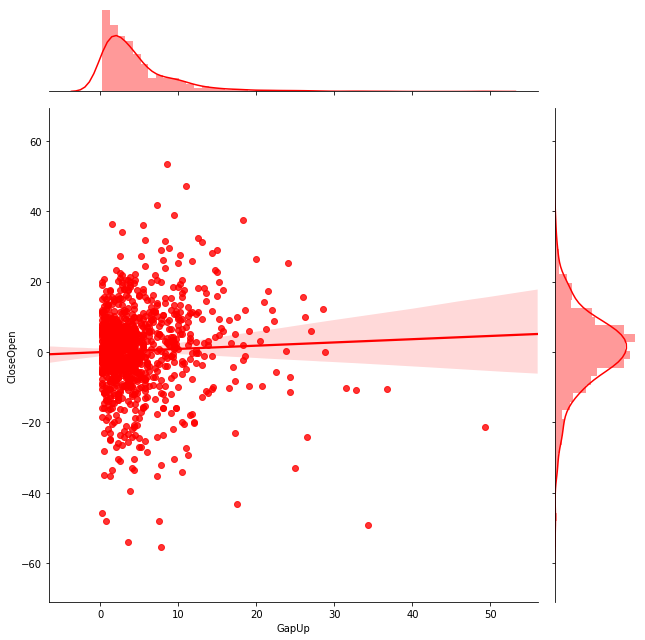

In [39]:
sns.jointplot(x='GapUp', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

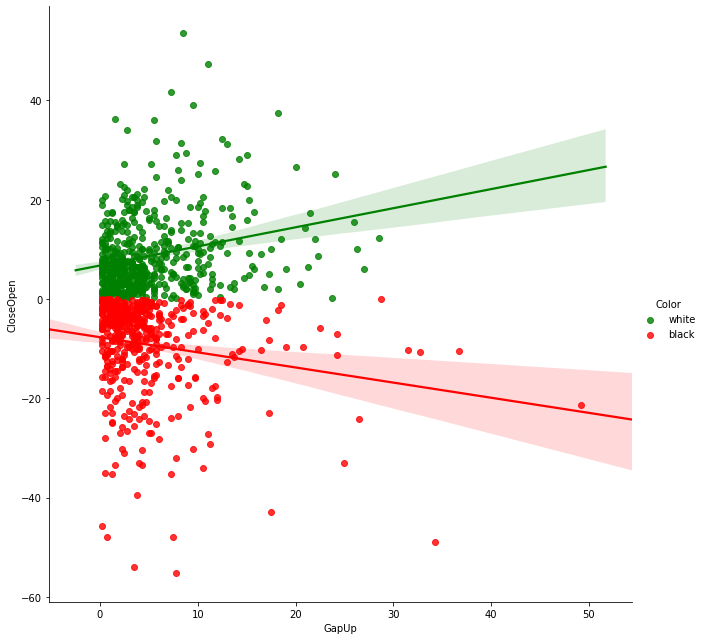

In [40]:
sns.lmplot(x = "GapUp", y = "CloseOpen", height = 9, hue = "Color", data = plot_data, fit_reg = True, 
           palette = dict(white = "green", black = "red"));

In [41]:
plot_data = dataset.iloc[:,:9].copy()
plot_data["GapUpRefilled"] = dataset.GapUpRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,volume,CloseOpen,CloseOpenPerc,Delta,Color,GapUpRefilled
date_time,,,,,,,,,,
2000-01-10 15:15:00,1523.00,1528.75,1504.50,1523.5,19428,0.50,0.03,14.00,white,12.25
2000-01-20 15:15:00,1526.50,1527.50,1497.25,1505.5,23516,-21.00,-1.38,4.75,black,3.25
2000-01-24 15:15:00,1516.00,1517.75,1452.50,1462.0,21689,-54.00,-3.56,12.75,black,3.50
2000-01-27 15:15:00,1473.75,1477.75,1437.25,1460.0,24440,-13.75,-0.93,8.50,black,2.25
2000-02-04 15:15:00,1488.75,1493.75,1475.75,1480.5,20169,-8.25,-0.55,3.50,black,1.25


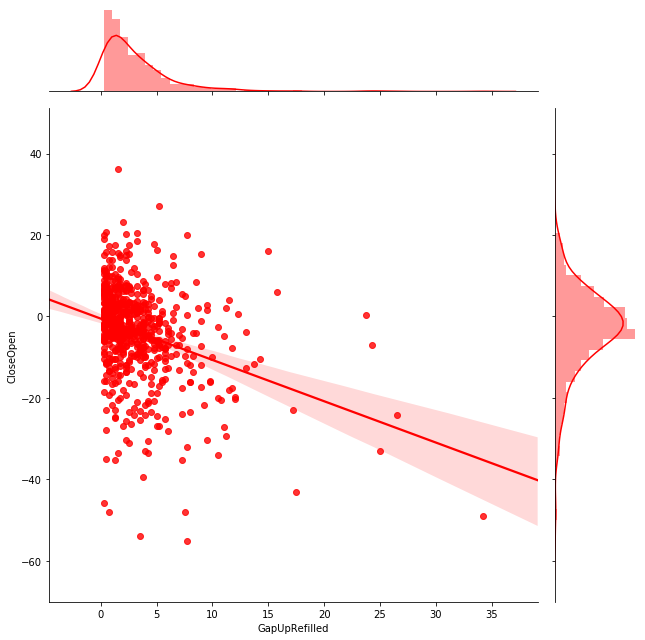

In [42]:
sns.jointplot(x='GapUpRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

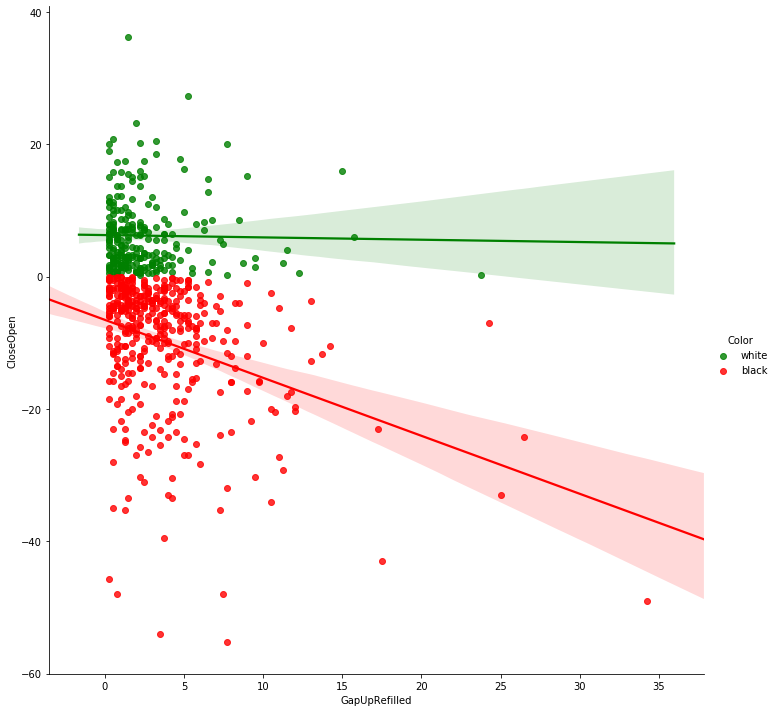

In [43]:
sns.lmplot(x = "GapUpRefilled", y = "CloseOpen", height = 10, hue = "Color", data = plot_data, fit_reg = True, 
           palette = dict(white = "green", black = "red"));

In [44]:
plot_data = dataset.iloc[:,:9].copy()
plot_data["GapUpDeepRefilled"] = dataset.GapUpRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,volume,CloseOpen,CloseOpenPerc,Delta,Color,GapUpDeepRefilled
date_time,,,,,,,,,,
2000-01-10 15:15:00,1523.00,1528.75,1504.50,1523.5,19428,0.50,0.03,14.00,white,12.25
2000-01-20 15:15:00,1526.50,1527.50,1497.25,1505.5,23516,-21.00,-1.38,4.75,black,3.25
2000-01-24 15:15:00,1516.00,1517.75,1452.50,1462.0,21689,-54.00,-3.56,12.75,black,3.50
2000-01-27 15:15:00,1473.75,1477.75,1437.25,1460.0,24440,-13.75,-0.93,8.50,black,2.25
2000-02-04 15:15:00,1488.75,1493.75,1475.75,1480.5,20169,-8.25,-0.55,3.50,black,1.25


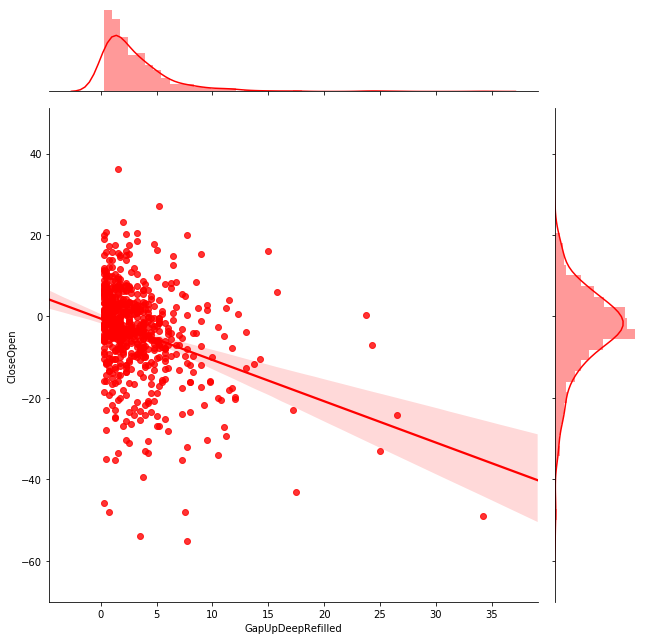

In [45]:
sns.jointplot(x='GapUpDeepRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

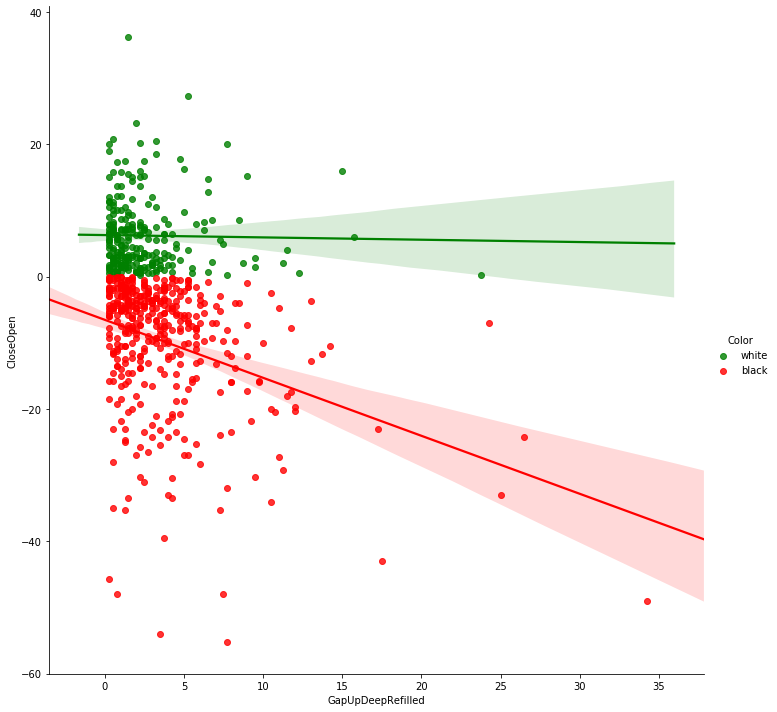

In [46]:
sns.lmplot(x = "GapUpDeepRefilled", y = "CloseOpen", height = 10, hue = "Color", data = plot_data, fit_reg = True, 
           palette = dict(white = "green", black = "red"));

## Gap Down

In [47]:
del dataset

In [48]:
dataset = load_data("@ES.D_1380min_Exchange.txt")
dataset['GapUp'] = np.where((dataset.open - dataset.high.shift(1)) > 0, 
                            (dataset.open - dataset.high.shift(1)), np.nan)
dataset['GapDown'] = np.where((dataset.open - dataset.low.shift(1)) < 0,
                              (dataset.open - dataset.low.shift(1)), np.nan)
dataset['GapDownRefilled'] = np.where((dataset.GapDown < 0) & \
                                      (dataset.high > dataset.low.shift(1)), 
                                       dataset.GapDown, np.nan)
dataset['GapDownDeepRefilled'] = np.where((dataset.GapDown < 0) & \
                                          (dataset.high > dataset.close.shift(1)),
                                           dataset.open - dataset.close.shift(1), np.nan)
dataset['GapDownPos'] = np.where((dataset.GapDown < 0) & \
                                 (dataset.close > dataset.open),
                                  dataset.close - dataset.open, np.nan)
dataset['GapDownNeg'] = np.where((dataset.GapDown < 0) & \
                                 (dataset.close < dataset.open),
                                  dataset.close - dataset.open, np.nan)
dataset.head()

,open,high,low,close,volume,GapUp,GapDown,GapDownRefilled,GapDownDeepRefilled,GapDownPos,GapDownNeg
date_time,,,,,,,,,,,
2000-01-03 15:15:00,1544.00,1545.25,1501.50,1516.00,19675,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 15:15:00,1498.25,1503.00,1458.75,1460.75,21282,NaN,-3.25,-3.25,NaN,NaN,-37.5
2000-01-05 15:15:00,1458.00,1476.50,1434.25,1462.25,24898,NaN,-0.75,-0.75,-2.75,4.25,NaN
2000-01-06 15:15:00,1455.00,1475.50,1450.50,1454.00,21831,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07 15:15:00,1461.50,1510.75,1461.00,1509.00,19994,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
gap_down_number = dataset.GapDown.count()
gap_down_perc = round(gap_down_number / dataset.open.count() * 100, 2)
gap_down_entity = round(abs(dataset.GapDown.sum()),2)
gap_down_entity_avg = round(abs(dataset.GapDown.mean()),2)
gap_down_money_avg = round(abs(gap_down_entity_avg * bigpointvalue),2)

gap_down_refilled_number = dataset.GapDownRefilled.count()
gap_down_refilled_perc = round(gap_down_refilled_number / gap_down_number * 100, 2)
gap_down_refilled_entity = round(abs(dataset.GapDownRefilled.sum()),2)
gap_down_refilled_entity_avg = round(abs(dataset.GapDownRefilled.mean()),2)
gap_down_refilled_money_avg = round(abs(gap_down_refilled_entity_avg * bigpointvalue),2)

gap_down_deep_refilled_number = dataset.GapDownDeepRefilled.count()
gap_down_deep_refilled_perc = round(gap_down_deep_refilled_number / gap_down_number * 100, 2)
gap_down_deep_refilled_entity = round(abs(dataset.GapDownDeepRefilled.sum()),2)
gap_down_deep_refilled_entity_avg = round(abs(dataset.GapDownDeepRefilled.mean()),2)
gap_down_deep_refilled_money_avg = round(abs(gap_down_deep_refilled_entity_avg * bigpointvalue),2)

gap_down_pos_number = dataset.GapDownPos.count()
gap_down_pos_perc = round(gap_down_pos_number / gap_down_number * 100, 2)
gap_down_pos_entity = round(dataset.GapDownPos.sum(),2)
gap_down_pos_entity_avg = round(dataset.GapDownPos.mean(),2)
gap_down_pos_money_avg = round(abs(gap_down_pos_entity_avg * bigpointvalue),2)

gap_down_neg_number = dataset.GapDownNeg.count()
gap_down_neg_perc = round(gap_down_neg_number / gap_down_number * 100, 2)
gap_down_neg_entity = round(dataset.GapDownNeg.sum(),2)
gap_down_neg_entity_avg = round(dataset.GapDownNeg.mean(),2)
gap_down_neg_money_avg = round(abs(gap_down_neg_entity_avg * bigpointvalue),2)

In [50]:
print("")
print("    GAP DOWN STATISTICS:")
print("")
print("        Number of Gap Down:                        ", round(gap_down_number,2))
print("        Percentage of Gap Down:                    ", round(gap_down_perc,2), "% of total bars")
print("        Total Entity of Gap Down:                  ", round(gap_down_entity,2),"points")
print("        Average Entity of Gap Down:                ", round(gap_down_entity_avg,2),"points")
print("        Average Money of Gap Down:                 ", round(gap_down_money_avg,2),"$")
print("")
print("        Number of Gap Down Refilled:               ", round(gap_down_refilled_number,2))
print("        Percentage of Gap Down Refilled:           ", round(gap_down_refilled_perc,2), "% of gaps down")
print("        Total Entity of Gap Down Refilled:         ", round(gap_down_refilled_entity,2),"points")
print("        Average Entity of Gap Down Refilled:       ", round(gap_down_refilled_entity_avg,2),"points")
print("        Average Money of Gap Down Refilled:        ", round(gap_down_refilled_money_avg,2),"$")
print("")
print("        Number of Gap Down Deep Refilled:          ", round(gap_down_deep_refilled_number,2))
print("        Percentage of Gap Down Deep Refilled:      ", round(gap_down_deep_refilled_perc,2), "% of gaps down")
print("        Total Entity of Gap Down Deep Refilled:    ", round(gap_down_deep_refilled_entity,2),"points")
print("        Average Entity of Gap Down Deep Refilled:  ", round(gap_down_deep_refilled_entity_avg,2),"points")
print("        Average Money of Gap Down Deep Refilled:   ", round(gap_down_deep_refilled_money_avg,2),"$")
print("")
print("        Number of Gap Down Positive Bars:          ", round(gap_down_pos_number,2))
print("        Percentage of Gap Down Positive Bars:      ", round(gap_down_pos_perc,2), "% of gaps down")
print("        Total Entity of Gap Down Positive Bars:    ", round(gap_down_pos_entity,2),"points")
print("        Average Entity of Gap Down Positive Bars:  ", round(gap_down_pos_entity_avg,2),"points")
print("        Average Money of Gap Down Positive Bars:   ", round(gap_down_pos_money_avg,2),"$")
print("")
print("        Number of Gap Down Negative Bars:          ", round(gap_down_neg_number,2))
print("        Percentage of Gap Down Negative Bars:      ", round(gap_down_neg_perc,2), "% of gaps down")
print("        Total Entity of Gap Down Negative Bars:    ", round(gap_down_neg_entity,2),"points")
print("        Average Entity of Gap Down Negative Bars:  ", round(gap_down_neg_entity_avg,2),"points")
print("        Average Money of Gap Down Negative Bars:   ", round(gap_down_neg_money_avg,2),"$")


    GAP DOWN STATISTICS:

        Number of Gap Down:                         700
        Percentage of Gap Down:                     14.07 % of total bars
        Total Entity of Gap Down:                   4283.75 points
        Average Entity of Gap Down:                 6.12 points
        Average Money of Gap Down:                  306.0 $

        Number of Gap Down Refilled:                498
        Percentage of Gap Down Refilled:            71.14 % of gaps down
        Total Entity of Gap Down Refilled:          2326.25 points
        Average Entity of Gap Down Refilled:        4.67 points
        Average Money of Gap Down Refilled:         233.5 $

        Number of Gap Down Deep Refilled:           336
        Percentage of Gap Down Deep Refilled:       48.0 % of gaps down
        Total Entity of Gap Down Deep Refilled:     2842.0 points
        Average Entity of Gap Down Deep Refilled:   8.46 points
        Average Money of Gap Down Deep Refilled:    423.0 $

        Num

In [51]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["GapDown"] = dataset.GapDown
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,GapDown
date_time,,,,,,
2000-01-04 15:15:00,1498.25,1503.00,1458.75,1460.75,-37.50,-3.25
2000-01-05 15:15:00,1458.00,1476.50,1434.25,1462.25,4.25,-0.75
2000-01-18 15:15:00,1515.75,1525.75,1511.25,1518.50,2.75,-3.50
2000-03-08 15:15:00,1409.50,1425.00,1397.50,1415.25,5.75,-10.00
2000-03-13 15:15:00,1414.25,1449.50,1412.50,1433.00,18.75,-29.00


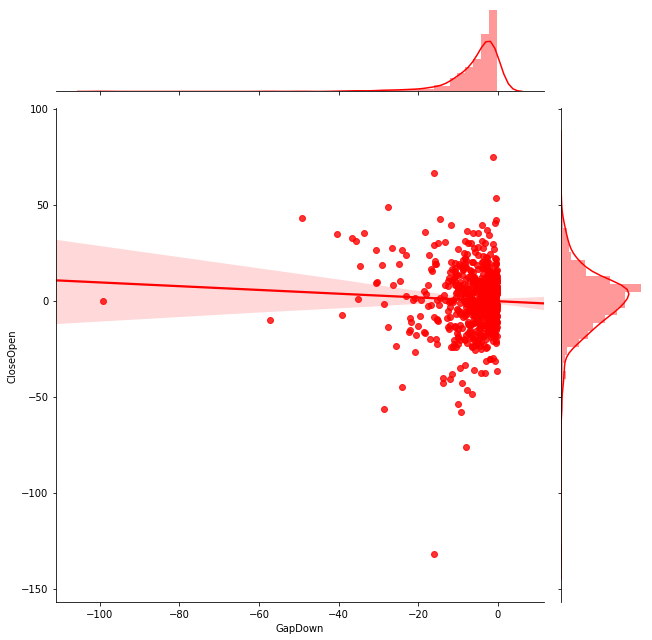

In [53]:
sns.jointplot(x='GapDown', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

In [54]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["GapDownRefilled"] = dataset.GapDownRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,GapDownRefilled
date_time,,,,,,
2000-01-04 15:15:00,1498.25,1503.00,1458.75,1460.75,-37.50,-3.25
2000-01-05 15:15:00,1458.00,1476.50,1434.25,1462.25,4.25,-0.75
2000-01-18 15:15:00,1515.75,1525.75,1511.25,1518.50,2.75,-3.50
2000-03-08 15:15:00,1409.50,1425.00,1397.50,1415.25,5.75,-10.00
2000-03-13 15:15:00,1414.25,1449.50,1412.50,1433.00,18.75,-29.00


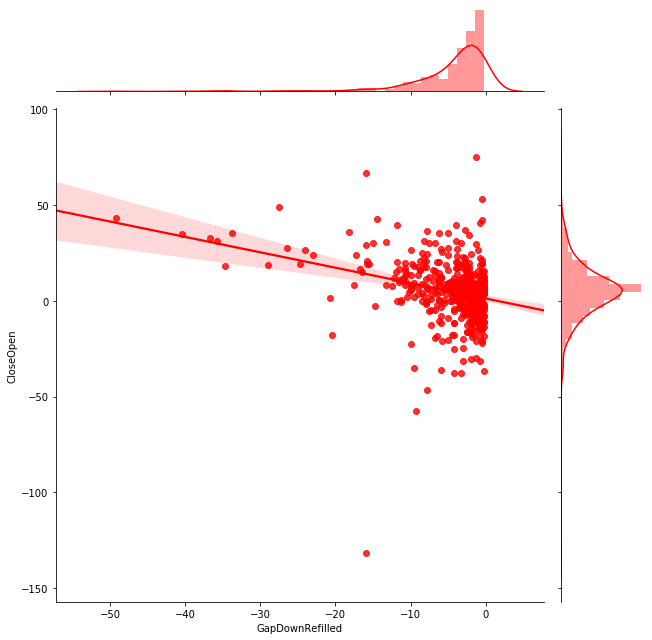

In [55]:
sns.jointplot(x='GapDownRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

In [56]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["GapDownDeepRefilled"] = dataset.GapDownDeepRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,GapDownDeepRefilled
date_time,,,,,,
2000-01-05 15:15:00,1458.00,1476.5,1434.25,1462.25,4.25,-2.75
2000-03-08 15:15:00,1409.50,1425.0,1397.50,1415.25,5.75,-10.00
2000-03-13 15:15:00,1414.25,1449.5,1412.50,1433.00,18.75,-34.75
2000-03-28 15:15:00,1565.25,1579.0,1554.25,1560.50,-4.75,-5.00
2000-04-11 15:15:00,1542.50,1560.5,1528.75,1549.00,6.50,-9.75


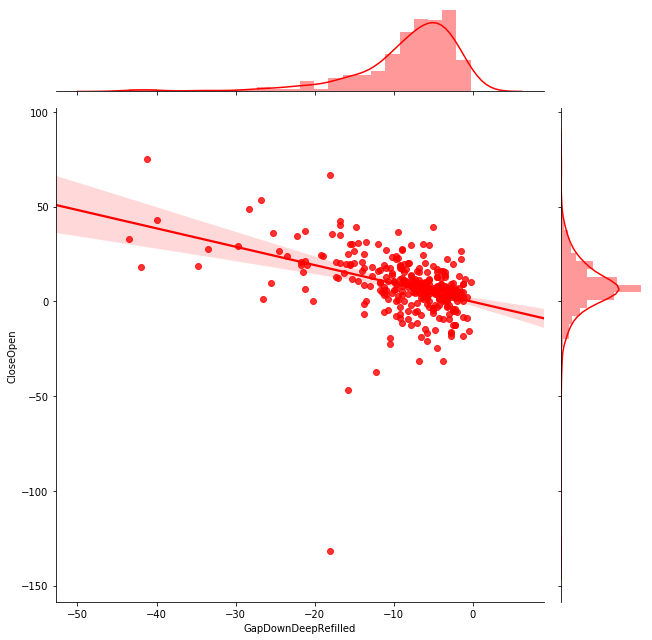

In [57]:
sns.jointplot(x='GapDownDeepRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

## Lap Up

In [79]:
del dataset

In [81]:
dataset = load_data("@ES.D_1380min_Exchange.txt")
dataset['LapDown'] = np.where((dataset.open < dataset.close.shift(1)) & \
                              (dataset.open >= dataset.low.shift(1)), 
                              (dataset.open - dataset.close.shift(1)), np.nan)
dataset['LapUp'] = np.where((dataset.open > dataset.close.shift(1)) & \
                            (dataset.open <= dataset.high.shift(1)), 
                            (dataset.open - dataset.close.shift(1)), np.nan)
dataset['LapUpRefilled'] = np.where((dataset.LapUp > 0) & \
                                    (dataset.low < dataset.close.shift(1)), 
                                     dataset.LapUp, np.nan)
dataset['LapUpPos'] = np.where((dataset.LapUp > 0) & \
                               (dataset.close > dataset.open), 
                                dataset.close - dataset.open, np.nan)
dataset['LapUpNeg'] = np.where((dataset.LapUp > 0) & \
                               (dataset.close < dataset.open), 
                                dataset.close - dataset.open, np.nan)
dataset.head(10)

,open,high,low,close,volume,LapDown,LapUp,LapUpRefilled,LapUpPos,LapUpNeg
date_time,,,,,,,,,,
2000-01-03 15:15:00,1544.00,1545.25,1501.50,1516.00,19675,NaN,NaN,NaN,NaN,NaN
2000-01-04 15:15:00,1498.25,1503.00,1458.75,1460.75,21282,NaN,NaN,NaN,NaN,NaN
2000-01-05 15:15:00,1458.00,1476.50,1434.25,1462.25,24898,NaN,NaN,NaN,NaN,NaN
2000-01-06 15:15:00,1455.00,1475.50,1450.50,1454.00,21831,-7.25,NaN,NaN,NaN,NaN
2000-01-07 15:15:00,1461.50,1510.75,1461.00,1509.00,19994,NaN,7.50,NaN,47.50,NaN
2000-01-10 15:15:00,1523.00,1528.75,1504.50,1523.50,19428,NaN,NaN,NaN,NaN,NaN
2000-01-11 15:15:00,1515.50,1520.75,1496.25,1503.25,21712,-8.00,NaN,NaN,NaN,NaN
2000-01-12 15:15:00,1503.75,1505.75,1488.00,1490.75,20841,NaN,0.50,0.5,NaN,-13.0
2000-01-13 15:15:00,1502.00,1516.00,1492.50,1508.25,18745,NaN,11.25,NaN,6.25,NaN


In [82]:
lap_up_number = dataset.LapUp.count()
lap_up_perc = round(lap_up_number / dataset.open.count() * 100, 2)
lap_up_entity = round(dataset.LapUp.sum(),2)
lap_up_entity_avg = round(dataset.LapUp.mean(),2)
lap_up_money_avg = round(abs(lap_up_entity_avg * bigpointvalue),2)

lap_up_refilled_number = dataset.LapUpRefilled.count()
lap_up_refilled_perc = round(lap_up_refilled_number / lap_up_number * 100, 2)
lap_up_refilled_entity = round(dataset.LapUpRefilled.sum(),2)
lap_up_refilled_entity_avg = round(dataset.LapUpRefilled.mean(),2)
lap_up_refilled_money_avg = round(abs(lap_up_refilled_entity_avg * bigpointvalue),2)

lap_up_pos_number = dataset.LapUpPos.count()
lap_up_pos_perc = round(lap_up_pos_number / lap_up_number * 100, 2)
lap_up_pos_entity = round(dataset.LapUpPos.sum(),2)
lap_up_pos_entity_avg = round(dataset.LapUpPos.mean(),2)
lap_up_pos_money_avg = round(abs(lap_up_pos_entity_avg * bigpointvalue),2)

lap_up_neg_number = dataset.LapUpNeg.count()
lap_up_neg_perc = round(lap_up_neg_number / lap_up_number * 100, 2)
lap_up_neg_entity = round(dataset.LapUpNeg.sum(),2)
lap_up_neg_entity_avg = round(dataset.LapUpNeg.mean(),2)
lap_up_neg_money_avg = round(abs(lap_up_neg_entity_avg * bigpointvalue),2)

In [83]:
print("")
print("    LAP UP STATISTICS:")
print("")
print("        Number of Lap Up:                          ", round(lap_up_number,2))
print("        Percentage of Lap Up:                      ", round(lap_up_perc,2), "% of total bars")
print("        Total Entity of Lap Up:                    ", round(lap_up_entity,2),"points")
print("        Average Entity of Lap Up:                  ", round(lap_up_entity_avg,2),"points")
print("        Average Money of Lap Up:                   ", round(lap_up_money_avg,2),"$")
print("")
print("        Number of Lap Up Refilled:                 ", round(lap_up_refilled_number,2))
print("        Percentage of Lap Up Refilled:             ", round(lap_up_refilled_perc,2), "% of laps up")
print("        Total Entity of Lap Up Refilled:           ", round(lap_up_refilled_entity,2),"points")
print("        Average Entity of Lap Up Refilled:         ", round(lap_up_refilled_entity_avg,2),"points")
print("        Average Money of Lap Up Refilled:          ", round(lap_up_refilled_money_avg,2),"$")
print("")
print("        Number of Lap Up Positive Bars:            ", round(lap_up_pos_number,2))
print("        Percentage of Lap Up Positive Bars:        ", round(lap_up_pos_perc,2), "% of laps up")
print("        Total Entity of Lap Up Positive Bars:      ", round(lap_up_pos_entity,2),"points")
print("        Average Entity of Lap Up Positive Bars:    ", round(lap_up_pos_entity_avg,2),"points")
print("        Average Money of Lap Up Positive Bars:     ", round(lap_up_pos_money_avg,2),"$")
print("")
print("        Number of Lap Up Negative Bars:            ", round(lap_up_neg_number,2))
print("        Percentage of Lap Up Negative Bars:        ", round(lap_up_neg_perc,2), "% of laps up")
print("        Total Entity of Lap Up Negative Bars:      ", round(lap_up_neg_entity,2),"points")
print("        Average Entity of Lap Up Negative Bars:    ", round(lap_up_neg_entity_avg,2),"points")
print("        Average Money of Lap Up Negative Bars:     ", round(lap_up_neg_money_avg,2),"$")


    LAP UP STATISTICS:

        Number of Lap Up:                           1579
        Percentage of Lap Up:                       31.74 % of total bars
        Total Entity of Lap Up:                     6806.0 points
        Average Entity of Lap Up:                   4.31 points
        Average Money of Lap Up:                    215.5 $

        Number of Lap Up Refilled:                  1160
        Percentage of Lap Up Refilled:              73.46 % of laps up
        Total Entity of Lap Up Refilled:            3896.25 points
        Average Entity of Lap Up Refilled:          3.36 points
        Average Money of Lap Up Refilled:           168.0 $

        Number of Lap Up Positive Bars:             816
        Percentage of Lap Up Positive Bars:         51.68 % of laps up
        Total Entity of Lap Up Positive Bars:       7268.75 points
        Average Entity of Lap Up Positive Bars:     8.91 points
        Average Money of Lap Up Positive Bars:      445.5 $

        Number

In [91]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["LapUp"] = dataset.LapUp
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,LapUp
date_time,,,,,,
2000-01-07 15:15:00,1461.50,1510.75,1461.00,1509.00,47.50,7.50
2000-01-12 15:15:00,1503.75,1505.75,1488.00,1490.75,-13.00,0.50
2000-01-13 15:15:00,1502.00,1516.00,1492.50,1508.25,6.25,11.25
2000-01-21 15:15:00,1510.50,1512.50,1498.50,1503.25,-7.25,5.00
2000-01-25 15:15:00,1466.00,1474.00,1446.75,1468.25,2.25,4.00


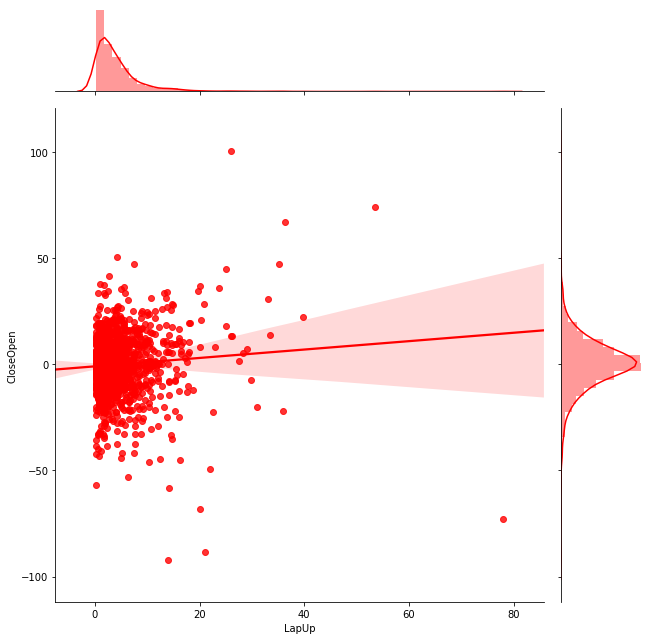

In [92]:
sns.jointplot(x='LapUp', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

In [93]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["LapUpRefilled"] = dataset.LapUpRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,LapUpRefilled
date_time,,,,,,
2000-01-12 15:15:00,1503.75,1505.75,1488.00,1490.75,-13.00,0.50
2000-01-21 15:15:00,1510.50,1512.50,1498.50,1503.25,-7.25,5.00
2000-01-25 15:15:00,1466.00,1474.00,1446.75,1468.25,2.25,4.00
2000-02-03 15:15:00,1473.75,1487.50,1454.50,1485.25,11.50,10.25
2000-02-09 15:15:00,1496.75,1498.00,1466.25,1467.75,-29.00,1.75


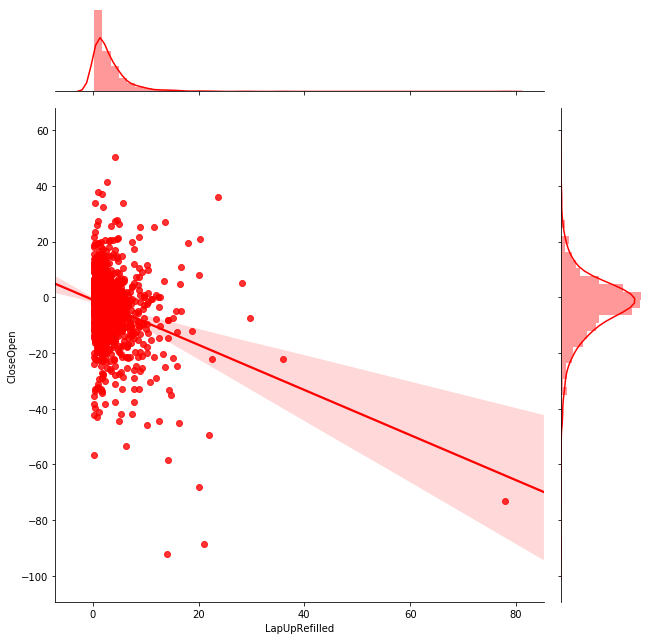

In [94]:
sns.jointplot(x='LapUpRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

## Lap Down

In [99]:
del dataset

In [100]:
dataset = load_data("@ES.D_1380min_Exchange.txt")
dataset['LapUp'] = np.where((dataset.open > dataset.close.shift(1)) & \
                            (dataset.open <= dataset.high.shift(1)), 
                            (dataset.open - dataset.close.shift(1)), np.nan)
dataset['LapDown'] = np.where((dataset.open < dataset.close.shift(1)) & \
                              (dataset.open >= dataset.low.shift(1)), 
                              (dataset.open - dataset.close.shift(1)), np.nan)
dataset['LapDownRefilled'] = np.where((dataset.LapDown < 0) & \
                                      (dataset.high > dataset.close.shift(1)),
                                       dataset.LapDown, np.nan)
dataset['LapDownPos'] = np.where((dataset.LapDown < 0) & \
                                 (dataset.close > dataset.open),
                                  dataset.close - dataset.open, np.nan)
dataset['LapDownNeg'] = np.where((dataset.LapDown < 0) & \
                                 (dataset.close < dataset.open),
                                  dataset.close - dataset.open, np.nan)
dataset.head(10)

,open,high,low,close,volume,LapUp,LapDown,LapDownRefilled,LapDownPos,LapDownNeg
date_time,,,,,,,,,,
2000-01-03 15:15:00,1544.00,1545.25,1501.50,1516.00,19675,NaN,NaN,NaN,NaN,NaN
2000-01-04 15:15:00,1498.25,1503.00,1458.75,1460.75,21282,NaN,NaN,NaN,NaN,NaN
2000-01-05 15:15:00,1458.00,1476.50,1434.25,1462.25,24898,NaN,NaN,NaN,NaN,NaN
2000-01-06 15:15:00,1455.00,1475.50,1450.50,1454.00,21831,NaN,-7.25,-7.25,NaN,-1.00
2000-01-07 15:15:00,1461.50,1510.75,1461.00,1509.00,19994,7.50,NaN,NaN,NaN,NaN
2000-01-10 15:15:00,1523.00,1528.75,1504.50,1523.50,19428,NaN,NaN,NaN,NaN,NaN
2000-01-11 15:15:00,1515.50,1520.75,1496.25,1503.25,21712,NaN,-8.00,NaN,NaN,-12.25
2000-01-12 15:15:00,1503.75,1505.75,1488.00,1490.75,20841,0.50,NaN,NaN,NaN,NaN
2000-01-13 15:15:00,1502.00,1516.00,1492.50,1508.25,18745,11.25,NaN,NaN,NaN,NaN


In [103]:
lap_down_number = dataset.LapDown.count()
lap_down_perc = round(lap_down_number / dataset.open.count() * 100, 2)
lap_down_entity = round(abs(dataset.LapDown.sum()),2)
lap_down_entity_avg = round(abs(dataset.LapDown.mean()),2)
lap_down_money_avg = round(abs(lap_down_entity_avg * bigpointvalue),2)

lap_down_refilled_number = dataset.LapDownRefilled.count()
lap_down_refilled_perc = round(lap_down_refilled_number / lap_down_number * 100, 2)
lap_down_refilled_entity = round(abs(dataset.LapDownRefilled.sum()),2)
lap_down_refilled_entity_avg = round(abs(dataset.LapDownRefilled.mean()),2)
lap_down_refilled_money_avg = round(abs(lap_down_refilled_entity_avg * bigpointvalue),2)

lap_down_pos_number = dataset.LapDownPos.count()
lap_down_pos_perc = round(lap_down_pos_number / lap_down_number * 100, 2)
lap_down_pos_entity = round(dataset.LapDownPos.sum(),2)
lap_down_pos_entity_avg = round(dataset.LapDownPos.mean(),2)
lap_down_pos_money_avg = round(abs(lap_down_pos_entity_avg * bigpointvalue),2)

lap_down_neg_number = dataset.LapDownNeg.count()
lap_down_neg_perc = round(lap_down_neg_number / lap_down_number * 100, 2)
lap_down_neg_entity = round(dataset.LapDownNeg.sum(),2)
lap_down_neg_entity_avg = round(dataset.LapDownNeg.mean(),2)
lap_down_neg_money_avg = round(abs(lap_down_neg_entity_avg * bigpointvalue),2)

In [104]:
print("")
print("    LAP DOWN STATISTICS:")
print("")
print("        Number of Lap Down:                        ", round(lap_down_number,2))
print("        Percentage of Lap Down:                    ", round(lap_down_perc,2), "% of total bars")
print("        Total Entity of Lap Down:                  ", round(lap_down_entity,2),"points")
print("        Average Entity of Lap Down:                ", round(lap_down_entity_avg,2),"points")
print("        Average Money of Lap Down:                 ", round(lap_down_money_avg,2),"$")
print("")
print("        Number of Lap Down Refilled:               ", round(lap_down_refilled_number,2))
print("        Percentage of Lap Down Refilled:           ", round(lap_down_refilled_perc,2), "% of laps down")
print("        Total Entity of Lap Down Refilled:         ", round(lap_down_refilled_entity,2),"points")
print("        Average Entity of Lap Down Refilled:       ", round(lap_down_refilled_entity_avg,2),"points")
print("        Average Money of Lap Down Refilled:        ", round(lap_down_refilled_money_avg,2),"$")
print("")
print("        Number of Lap Down Positive Bars:          ", round(lap_down_pos_number,2))
print("        Percentage of Lap Down Positive Bars:      ", round(lap_down_pos_perc,2), "% of laps down")
print("        Total Entity of Lap Down Positive Bars:    ", round(lap_down_pos_entity,2),"points")
print("        Average Entity of Lap Down Positive Bars:  ", round(lap_down_pos_entity_avg,2),"points")
print("        Average Money of Lap Down Positive Bars:   ", round(lap_down_pos_money_avg,2),"$")
print("")
print("        Number of Lap Down Negative Bars:          ", round(lap_down_neg_number,2))
print("        Percentage of Lap Down Negative Bars:      ", round(lap_down_neg_perc,2), "% of laps down")
print("        Total Entity of Lap Down Negative Bars:    ", round(lap_down_neg_entity,2),"points")
print("        Average Entity of Lap Down Negative Bars:  ", round(lap_down_neg_entity_avg,2),"points")
print("        Average Money of Lap Down Negative Bars:   ", round(lap_down_neg_money_avg,2),"$")


    LAP DOWN STATISTICS:

        Number of Lap Down:                         1614
        Percentage of Lap Down:                     32.44 % of total bars
        Total Entity of Lap Down:                   6561.75 points
        Average Entity of Lap Down:                 4.07 points
        Average Money of Lap Down:                  203.5 $

        Number of Lap Down Refilled:                1184
        Percentage of Lap Down Refilled:            73.36 % of laps down
        Total Entity of Lap Down Refilled:          3757.25 points
        Average Entity of Lap Down Refilled:        3.17 points
        Average Money of Lap Down Refilled:         158.5 $

        Number of Lap Down Positive Bars:           886
        Percentage of Lap Down Positive Bars:       54.89 % of laps down
        Total Entity of Lap Down Positive Bars:     7438.5 points
        Average Entity of Lap Down Positive Bars:   8.4 points
        Average Money of Lap Down Positive Bars:    420.0 $

        N

In [106]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["LapDown"] = dataset.LapDown
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,LapDown
date_time,,,,,,
2000-01-06 15:15:00,1455.00,1475.50,1450.50,1454.00,-1.00,-7.25
2000-01-11 15:15:00,1515.50,1520.75,1496.25,1503.25,-12.25,-8.00
2000-01-19 15:15:00,1511.25,1523.25,1499.50,1521.75,10.50,-7.25
2000-01-26 15:15:00,1467.25,1471.50,1457.50,1465.25,-2.00,-1.00
2000-01-28 15:15:00,1446.75,1456.00,1410.50,1416.25,-30.50,-13.25


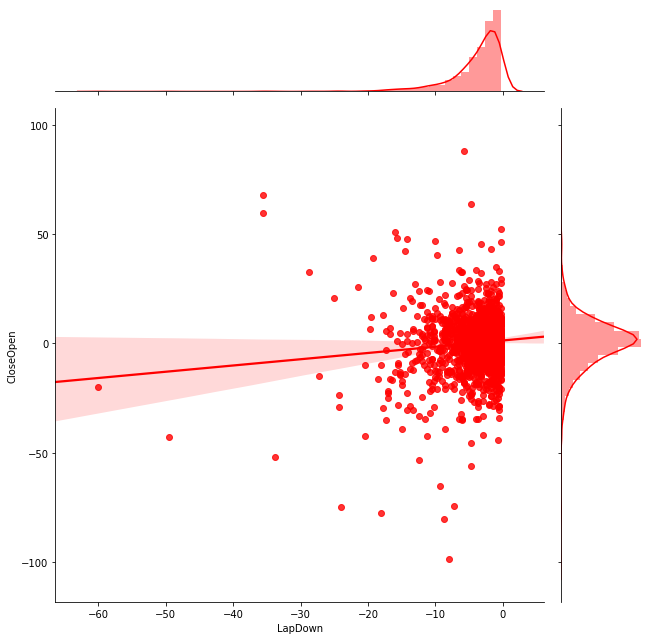

In [107]:
sns.jointplot(x='LapDown', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');

In [109]:
plot_data = dataset.iloc[:,:4].copy()
plot_data["CloseOpen"] = dataset.close - dataset.open
plot_data["LapDownRefilled"] = dataset.LapDownRefilled
plot_data.dropna(inplace = True)
plot_data.head()

,open,high,low,close,CloseOpen,LapDownRefilled
date_time,,,,,,
2000-01-06 15:15:00,1455.00,1475.50,1450.50,1454.00,-1.00,-7.25
2000-01-19 15:15:00,1511.25,1523.25,1499.50,1521.75,10.50,-7.25
2000-01-26 15:15:00,1467.25,1471.50,1457.50,1465.25,-2.00,-1.00
2000-01-31 15:15:00,1415.25,1452.25,1406.25,1450.00,34.75,-1.00
2000-02-01 15:15:00,1448.25,1471.00,1440.50,1466.00,17.75,-1.75


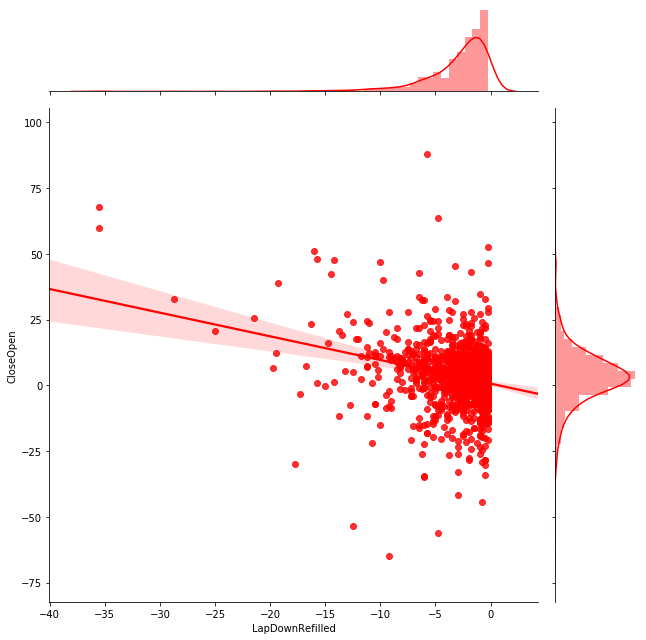

In [110]:
sns.jointplot(x='LapDownRefilled', y='CloseOpen', height=9, data = plot_data, kind='reg', color='r');